   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

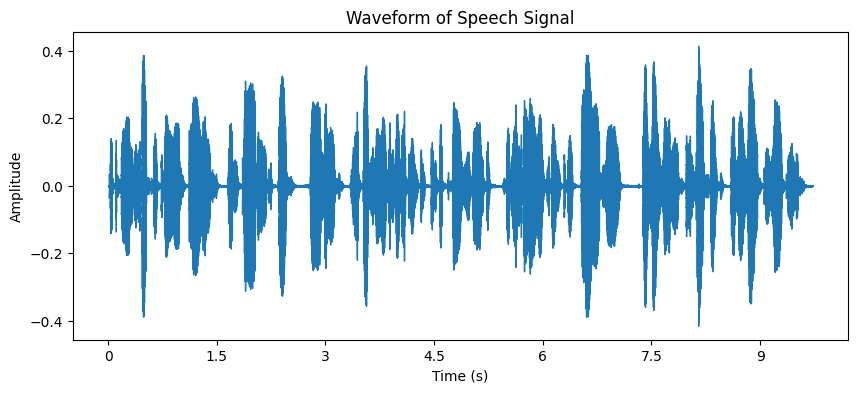

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Recognized Phonemes: BETWEEN SECRETARY DILLAN AND DONALD F HORNIG SPECIAL ASSISTANT TO THE PRESIDENT FOR SCIENCE AND TECHNOLOGY IS A USEFUL EFFORT IN THE RIGHT DIRECTION


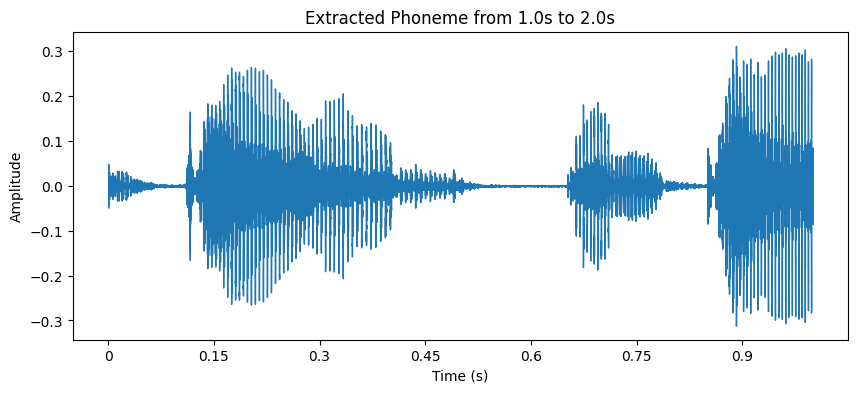

In [ ]:
!pip install torchaudio librosa transformers matplotlib

import torchaudio
import torchaudio.transforms as transforms
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC

# Load audio file
filename = "/content/LJ050-0267.wav"  # Replace with the actual file path
waveform, sample_rate = torchaudio.load(filename)

# Convert to Mono
waveform = waveform.mean(dim=0)

# Resample to 16 kHz
resampler = transforms.Resample(orig_freq=sample_rate, new_freq=16000)
waveform = resampler(waveform)
sample_rate = 16000  # Update sample rate

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(waveform.numpy(), sr=sample_rate)
plt.title("Waveform of Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
# Load pre-trained model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

# Process the waveform
input_values = processor(waveform.numpy(), sampling_rate=sample_rate, return_tensors="pt").input_values

# Get predictions
with torch.no_grad():
    logits = model(input_values).logits

# Convert logits to predicted IDs
predicted_ids = torch.argmax(logits, dim=-1)

# Decode into text
transcription = processor.batch_decode(predicted_ids)[0]
print("Recognized Phonemes:", transcription)
# Define time interval (Example: Extracting 1-2 seconds)
start_time = 1.0  # Start in seconds
end_time = 2.0  # End in seconds
start_sample = int(start_time * sample_rate)
end_sample = int(end_time * sample_rate)

# Extract segment
phoneme_segment = waveform[start_sample:end_sample]

# Plot the extracted phoneme
plt.figure(figsize=(10, 4))
librosa.display.waveshow(phoneme_segment.numpy(), sr=sample_rate)
plt.title(f"Extracted Phoneme from {start_time}s to {end_time}s")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()